In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm.notebook import trange, tqdm

from matplotlib.ticker import AutoMinorLocator


## VS Code, choisir un seul des 3 :

# Pour affichage interactif (notamment 3D) dans notebook
# %matplotlib widget

# Pour affichage interactif (notamment 3D) hors du notebook
# %matplotlib qt

# Pour affichage simple dans notebook
%config InlineBackend.figure_format = 'png'

t = time.time()

In [2]:
df = pd.read_csv('data/df_train_prepro.csv').sample(frac=1)
df

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,hashed_uid,hashed_xd_id,valueperclick,device_type,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size
793460,2020-10-14,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,3,web,1,4.0,2.0,12.0,-2.129443e+09,...,b'cH\x1f\xf0\x16\x00\x95\xf4\x16v4\x8a\xbbl\xe...,b't\xd4\x8a\xd3j\xfb\xac\xb3\xe6\xb5S\x0b\x84\...,0.245278,Desktop,0,0.422000,2020-10-14 07:50:20,7,Wednesday,65520
1539751,2020-10-14,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,29.0,0.0,127.0,7.277829e+08,...,b'\xa8\xc6\xd9i\xbe{\xf5w\x9d<\x00%\xd5\xaa\xb...,b'\xd5\xbe\xaek$\x16\x98\xf3x\xe2\x14\xaf\xe2e...,0.273522,iPhone,0,0.602358,2020-10-14 07:46:50,7,Wednesday,0
392403,2020-10-17,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'%\x01\xb1\xdf)Dh\x9f=j\xe81my\xf9\xa3\xe1\xd...,5,web,1,16.0,0.0,10.0,-1.821682e+09,...,b'\xa4M\xb5\x9e[\xb3\xde\x8c\xec\xb3\xf8+\xbc\...,b'\xa4M\xb5\x9e[\xb3\xde\x8c\xec\xb3\xf8+\xbc\...,0.153130,Desktop,0,0.435972,2020-10-17 18:25:50,18,Saturday,0
787914,2020-10-13,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,7,web,1,73.0,1.0,127.0,-8.462803e+08,...,b'\xe5\x82\xe9\x18tr\xbf\xb4\xee\xc9\xc5[\xa0\...,b'\xa7ckAv\x1b\x19\x0e\x08\xb47f\x94AJ\x93\x1a...,0.245422,Desktop,0,0.422874,2020-10-13 10:17:00,10,Tuesday,4
932570,2020-10-15,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'\xe1\xcb\xbbX[\xbb\x9dq\xc9\xdbu\xb8R\x96\x9...,9,web,1,6.0,2.0,10.0,-1.464124e+09,...,"b"",\xc8\xf5hq\x9c'\xe3\xbf\xd0\x87un\xd0\x1b!\...",b' D!\xc5T@(\x91\xa3\xc7\x19\xb2aM\r\xa4\x0f\x...,0.127520,Desktop,0,0.408502,2020-10-15 07:41:10,7,Thursday,242500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847112,2020-10-14,b'FH!\x9f4\x0bW%;\xf4\x85\xe3\x15J\xd8\x96\xea...,b'\xa9j\x02\xbbyy\x98\xfb\xc7\xaf\x06L#\x8d\x9...,4,web,1,73.0,0.0,127.0,7.735317e+08,...,b'\xe9\tY\xac\x95p\xd4f+\x8eV\x15L\xf1\x8b\x8a...,"b""\xef\x06`a\x10\xef2UIg:\x9f\x7f\x98\x81\xc6\...",0.249622,Desktop,0,0.943214,2020-10-14 14:51:40,14,Wednesday,242500
1060136,2020-10-17,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,1,app_android,1,30.0,0.0,127.0,-1.716364e+09,...,b'YC\xd0\x03LEhQ\xd7*\xceO\xf5&b0[i\xca\xc6\x0...,b'\xb0\xec\ng){\xfa\xda\x9e\xcbanO\xd2a\xf1\xf...,0.088529,Android,0,0.050000,2020-10-17 06:33:30,6,Saturday,75000
1515207,2020-10-15,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'\xef5\x9d\xc0y\x18\xa1\x8c\xa5l\xb5\r\x92-\x...,6,web,1,74.0,0.0,127.0,3.439832e+08,...,b'\xcc\x04\x94\xba]\x07M\xc0l\xf4\xafaF\x83\xc...,b'\xcc\x04\x94\xba]\x07M\xc0l\xf4\xafaF\x83\xc...,0.087429,Desktop,0,0.076596,2020-10-15 08:03:30,8,Thursday,0
1493793,2020-10-13,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'\\_F\xe1L/\xf6:\xea\xac\x03\x01\xf5\x98\x87\...,1,app_android,1,73.0,0.0,127.0,NaN,...,b'=~0s\xe6!m-5\xe8\xd8\xf4\xa8IL\xd7\x1b\xe6\x...,b'=~0s\xe6!m-5\xe8\xd8\xf4\xa8IL\xd7\x1b\xe6\x...,0.141346,Android,0,0.027606,2020-10-13 18:37:50,18,Tuesday,21600


In [3]:
df.dtypes

day                                                object
hashed_partner_id                                  object
hashed_campaign_id                                 object
contextid                                           int64
display_env                                        object
target_env                                          int64
rtbtypeid                                         float64
rtbadvisibility                                   float64
rtb_detectedlanguage                              float64
urlhash2                                          float64
urlhash3                                          float64
urlhash4                                          float64
user_country                                       object
hashed_affiliateid                                 object
hashed_app_id                                      object
googleviewability                                 float64
googlepagevertical                                float64
campaignscenar

# Corrélations

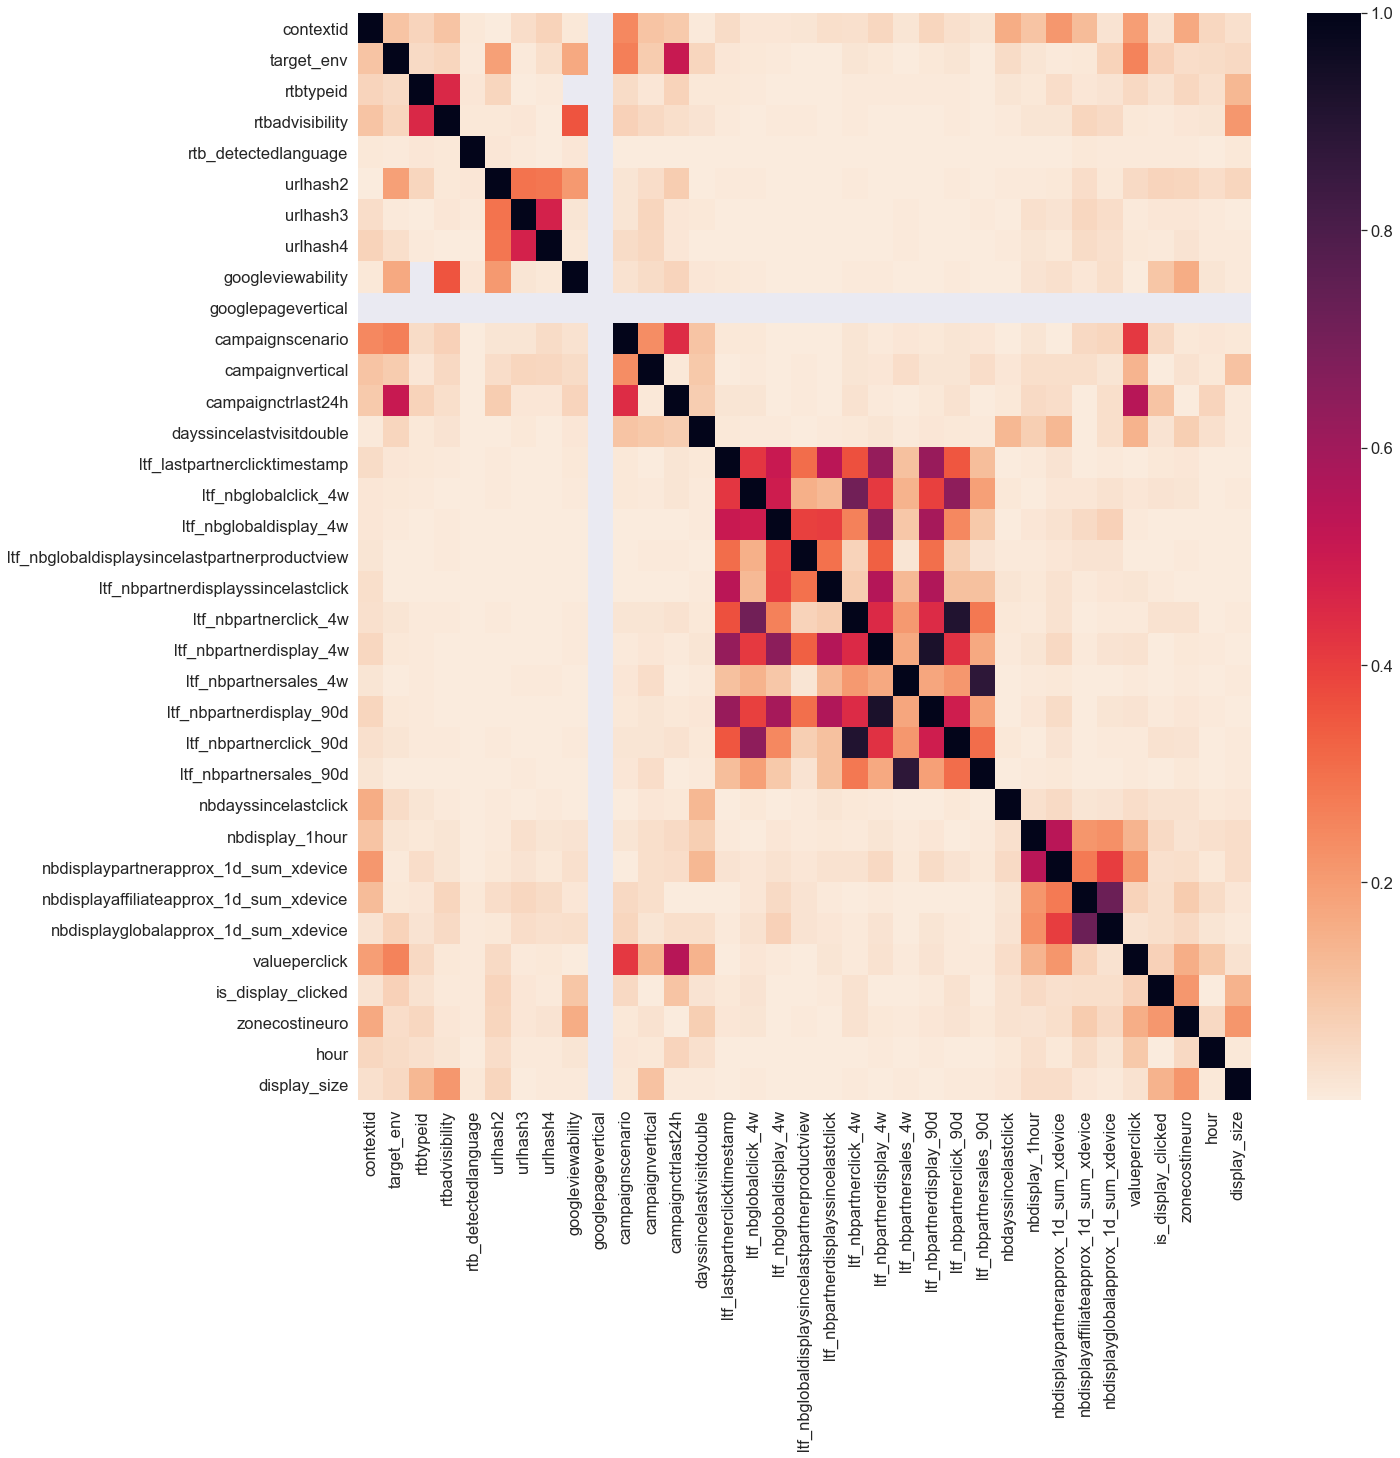

In [4]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = df.corr()
corrMatrix = np.abs(corrMatrix)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

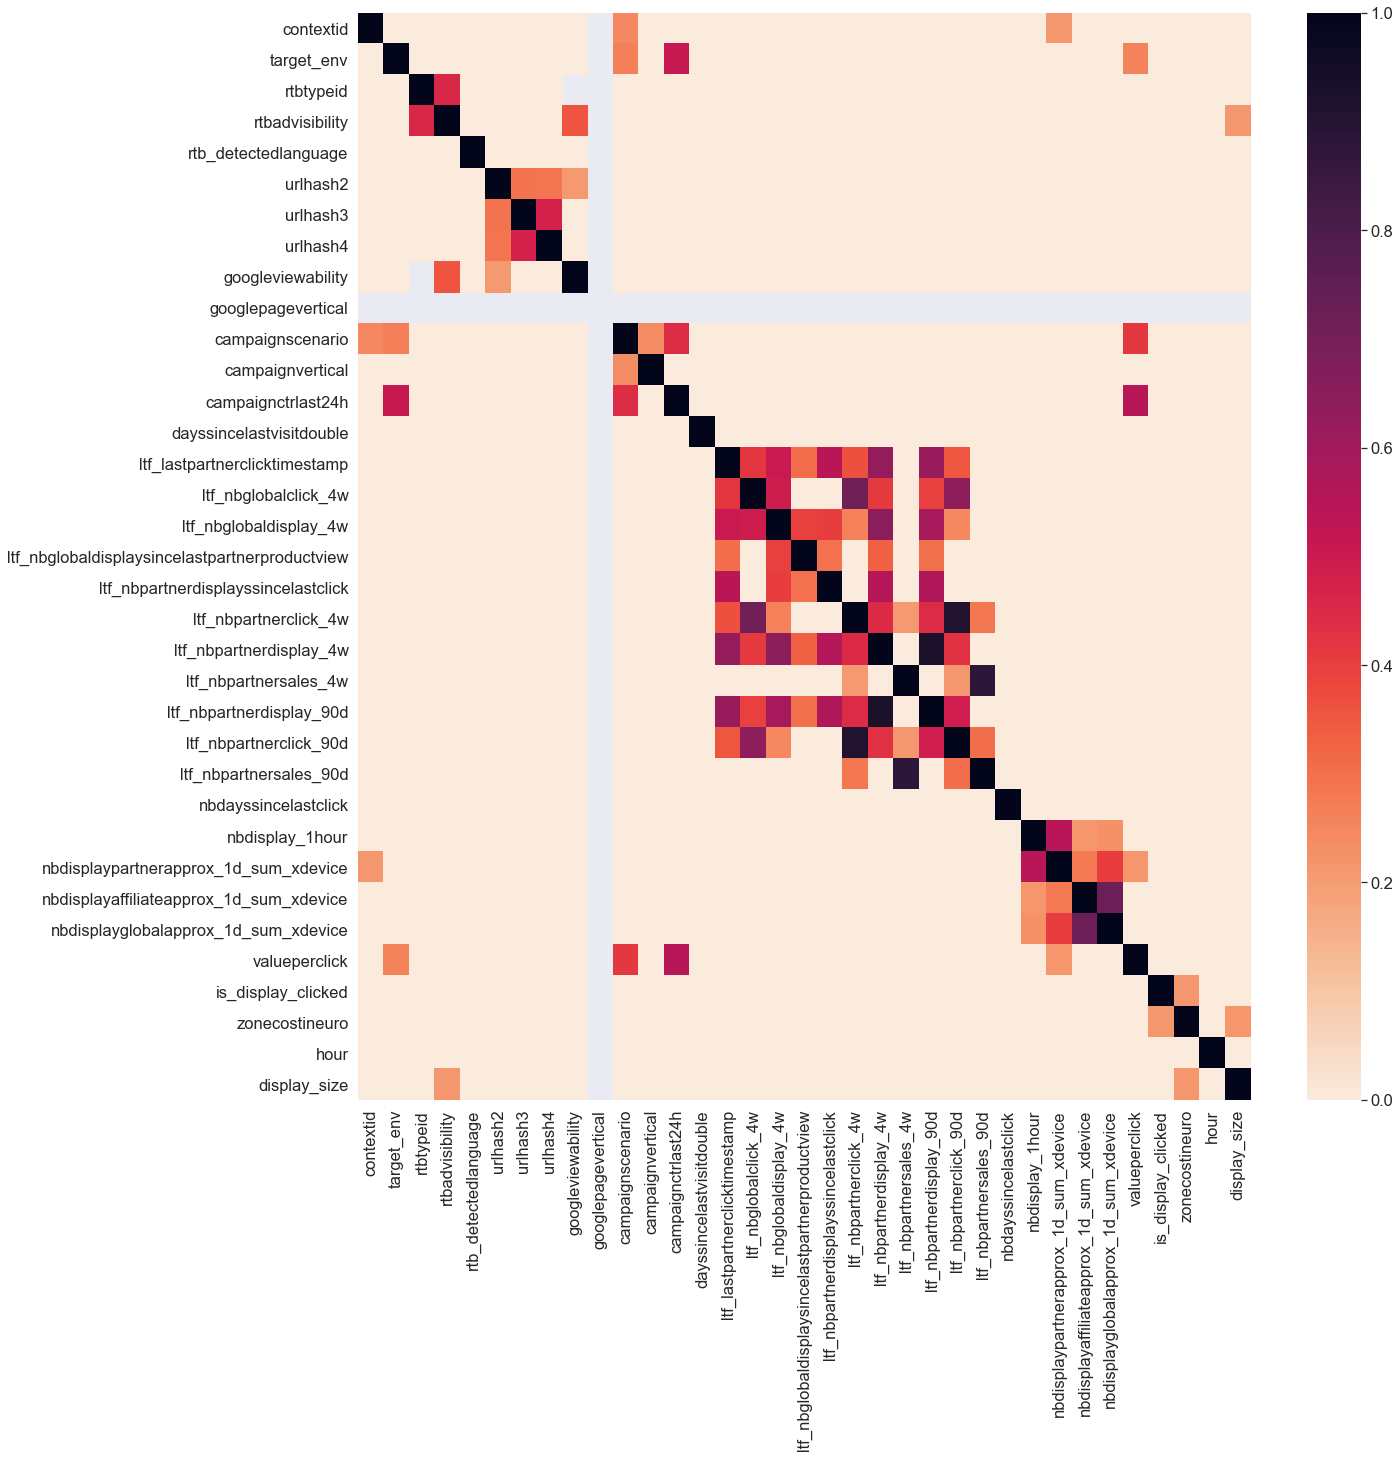

In [5]:
fig = plt.figure(figsize=(20,20))
sns.set(font_scale=1.5)
corrMatrix = corrMatrix.applymap(lambda x : 0 if x <= 0.2 else x)
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.show()

# Pourcentages de clics selon les modalités de plusieurs variables explicatives

In [6]:
def to_discrete(variable, n=10):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = pd.Series(index=df.index, dtype=int)
    var_min = df[variable].min()
    var_max = df[variable].max()
    pas = (var_max - var_min)/n
    for i in trange(len(df)):
        j = -1
        while df[variable].iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var.iloc[i] = j
    return discrete_var

In [7]:
def to_discrete_mean(variable, n=10):
    """
    Renvoie un objet Series contenant une version discrète de la variable
    numérique 'variable' dans le data frame df.
    Cette variable discrète est constituée de dix catégories croissantes.
    """
    discrete_var = pd.Series(index=df.index, dtype=float)
    var_min = df[variable].min()
    var_max = df[variable].max()
    pas = (var_max - var_min)/n
    for i in trange(len(df)):
        j = -1
        while df[variable].iloc[i] >= var_min + (j+1)*pas:
            j += 1
        if j == n:
            j = n-1
        discrete_var.iloc[i] = var_min + (j+0.5)*pas
    return discrete_var

In [8]:
def ratio_plot(variable, zoom=False):
    """
    Trace le pourcentage de clics selon la variable 'variable' dans df.
    """
    clicked = df[df['is_display_clicked'] == 1].groupby(variable).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(variable).count()['is_display_clicked']
    ratio = clicked / (clicked + notclicked)
    
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    ratio.plot(ax=ax)
    plt.xticks(rotation=0)
    
    if not zoom:
        y_min, y_max = ax.get_ylim()
        y_min = 0
        ax.set_ylim(y_min, y_max)
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)
    
    ax.set_title(f"Pourcentage de clics en fonction de {variable}")
    ax.set_xlabel(f"{variable}")
    ax.set_ylabel('Nb de clics/ (nb de clics + nb de non clics)')

    plt.show()
    plt.style.use('default')

In [9]:
def stacked_barplot(column):
    clicked = df[df['is_display_clicked'] == 1].groupby(column).count()['is_display_clicked']
    notclicked = df[df['is_display_clicked'] == 0].groupby(column).count()['is_display_clicked']
    total = df.groupby('contextid').count()['is_display_clicked']
    clicked = clicked / total * 100
    notclicked = notclicked / total * 100

    r = list(range(len(clicked)))

    # plot
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(8, 6))
    barWidth = 0.85
    names = clicked.index
    # Create orange Bars
    ax.bar(r, list(notclicked), color='#f9bc86', edgecolor='white', width=barWidth, label="no click")
    # # Create blue Bars
    ax.bar(r, list(clicked), bottom=list(notclicked), color='#a3acff',
        edgecolor='white', width=barWidth, label='click')
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which='major', axis='y')
    ax.grid(b=True, which='minor', axis='y', linestyle='--', alpha=0.2)

    plt.legend()
    # Custom x axis
    plt.xticks(r, names)
    plt.xlabel(column)
    plt.ylabel('Répartition des clics')

    # Show graphic
    plt.show()
    plt.style.use('default')

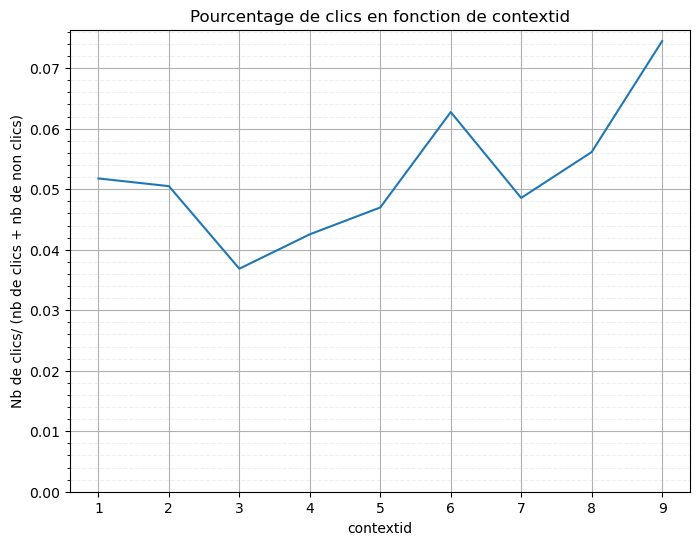

In [10]:
ratio_plot("contextid")

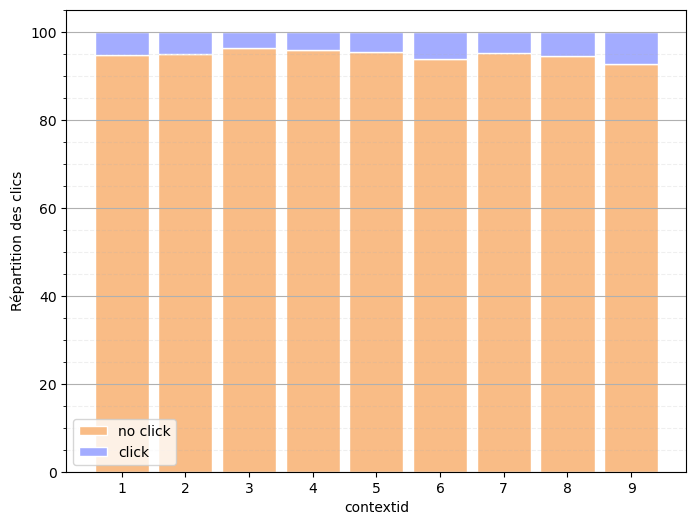

In [11]:
stacked_barplot('contextid')

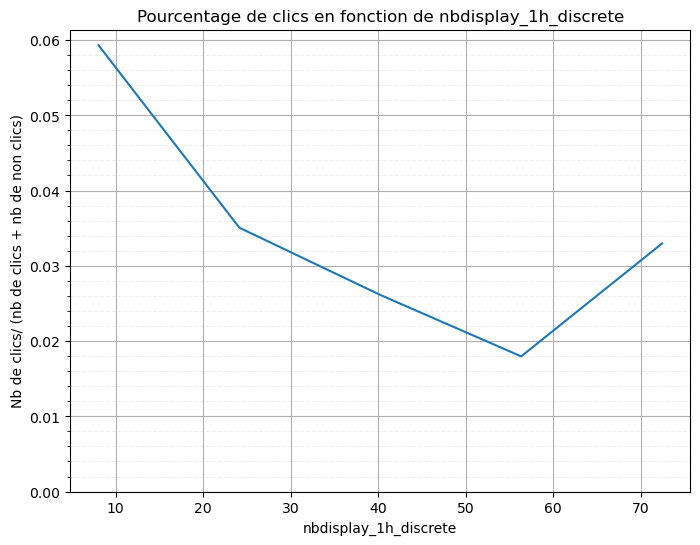

Wall time: 1min 49s


In [12]:
%%time
df["nbdisplay_1h_discrete"] = to_discrete_mean("nbdisplay_1hour")
ratio_plot("nbdisplay_1h_discrete")

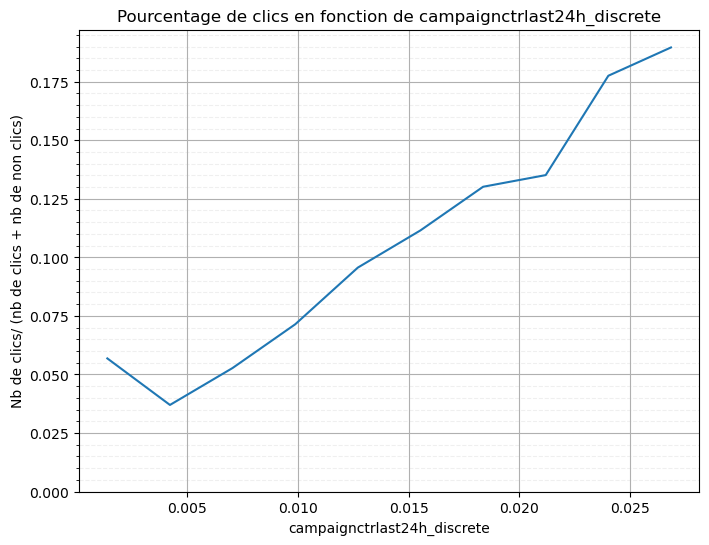

Wall time: 2min 20s


In [13]:
%%time
df["campaignctrlast24h_discrete"] = to_discrete_mean("campaignctrlast24h")
ratio_plot("campaignctrlast24h_discrete")

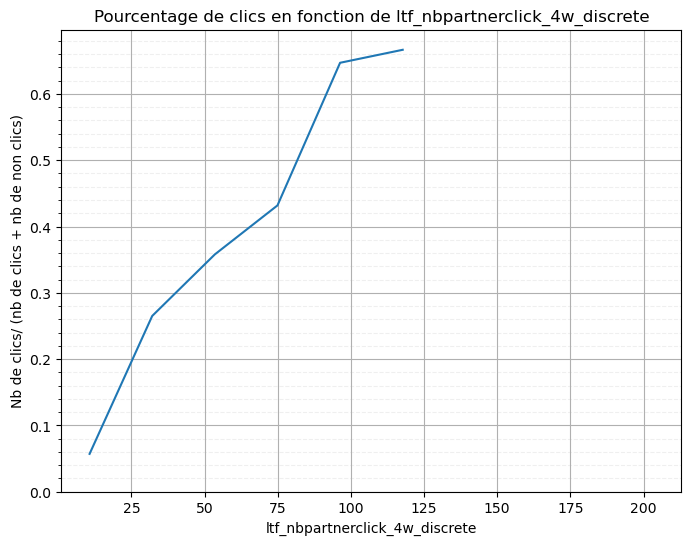

In [14]:
df["ltf_nbpartnerclick_4w_discrete"] = to_discrete_mean("ltf_nbpartnerclick_4w")
ratio_plot("ltf_nbpartnerclick_4w_discrete")

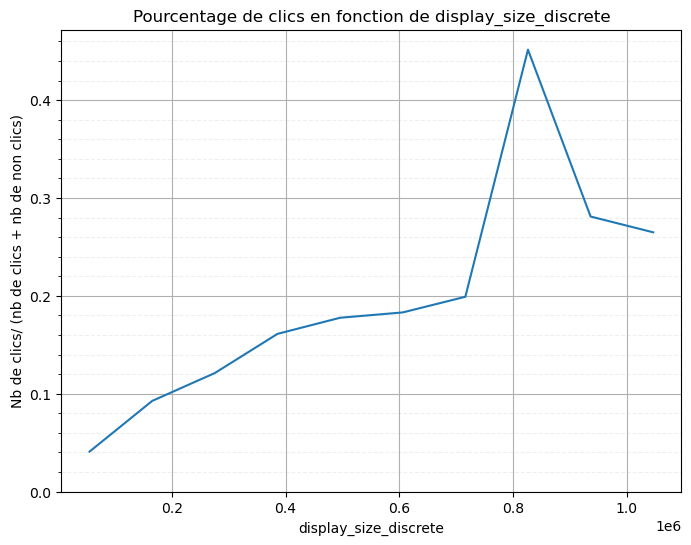

In [15]:
df["display_size_discrete"] = to_discrete_mean("display_size")
ratio_plot("display_size_discrete")

In [16]:
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']

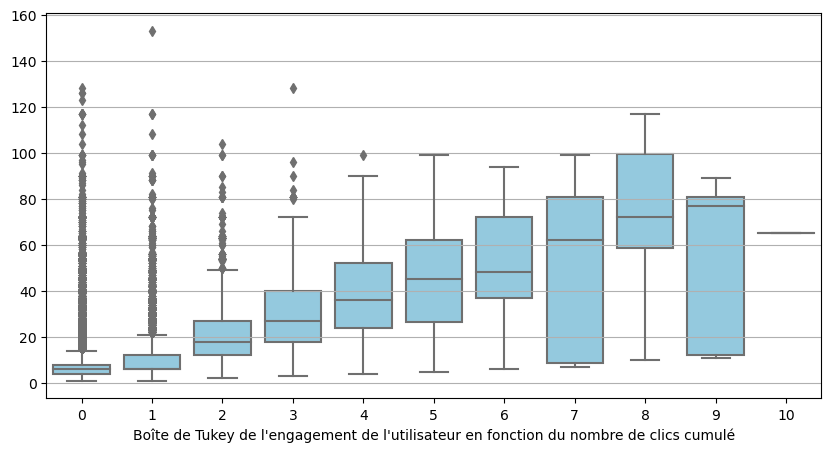

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

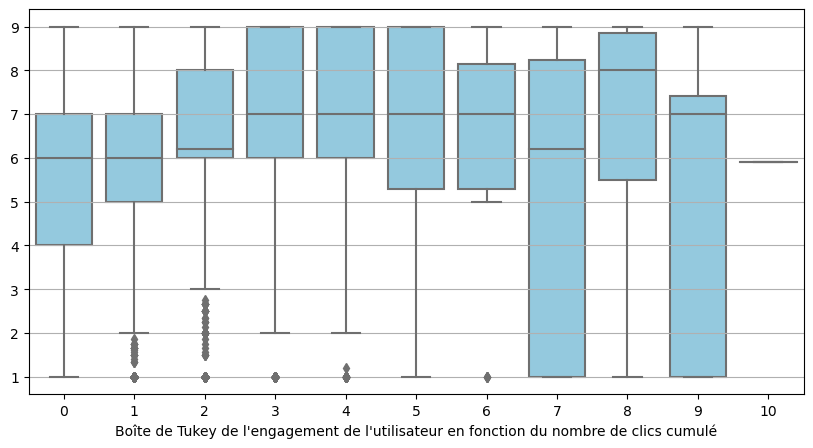

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('default')
sns.boxplot(x="is_display_clicked", y="contextid_weighted", data=d, ax=ax, color="skyblue")
ax.set_xlabel("Boîte de Tukey de l'engagement de l'utilisateur en fonction du nombre de clics cumulé")
ax.set_ylabel('')
ax.grid(axis='y')
plt.show()
plt.style.use('default')

# Bots

Calcul du nombre de clics par utilisateurs

In [19]:
a = df[['is_display_clicked', 'hashed_uid']].groupby(['hashed_uid']).sum()
a.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_uid,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0


In [20]:
# `hashed_uid` : Hashed identification number of the Web user
d = df[['is_display_clicked', 'hashed_uid', 'contextid']].groupby(['hashed_uid']).sum()
d.sort_values('is_display_clicked', ascending=False, inplace=True)
d['user_apperances'] = df['hashed_uid'].value_counts()
d['contextid_weighted'] = d['contextid'] / d['user_apperances']
d

,is_display_clicked,contextid,user_apperances,contextid_weighted
hashed_uid,,,,
b'\x187\xb3\x93\x8cy\xd0MSG?\xd7\xd9\xbav?8$#(-*x\xd1\x1c\xed\x18\xa8\xd8y\x8b\xf1',10,65,11,5.909091
b'#\x0b\xd7*\xa1\xae\x8fLT\xe1[W\x9f\xaf^-1\xfd~\x0f\x0ca\xf7+\x80?)_w\xdd\x9bR',9,77,11,7.000000
b'vp\xd9\xed/\xa1b\xc31\x99FO\x0e\xd9{27\xf1\x8b\x19[`\xba2\xc2\xc8\xb0y\x1f\xb8c\xd0',9,81,9,9.000000
b'\x13\x88\x8d\xd3h\xd9\xa1f\xd3\xea\x1e\x8d\xb7Dn\xa2\x0c>\xea\xf5n\xd3\xb1\xcbJ\x10\x06\x19\xde\x04J\xf9',9,11,11,1.000000
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9,12,12,1.000000
...,...,...,...,...
"b'\x05\xb2R\x0b\xca\xb8c\x9c8\xd9\xbas\x99\xc7j\xf3\xbeEgR\xe4\xfe\xaa\xe6,\x14\xb6\x15 \x1f\xbf\xcf'",0,8,1,8.000000
b'\x05\xb2[\x88\x06\x81!q\xe8<XKL\t\xcb\x04\xbb\xcd\xd9\xab\xb4\xc3UA\xb3UR\xaa~z}\xfa',0,8,1,8.000000
b'\x05\xb2\n\xa3\x95\xb22\xc9\xec\xf8\xc4\rn\xb7\\\x1dx\xc5\x10\x9a_p\x8e6l\xf3Oc!J]H',0,16,2,8.000000


In [21]:
# `hashed_xd_id` : Hashed cross device identification number 
b = df[['is_display_clicked', 'hashed_xd_id']].groupby(['hashed_xd_id']).sum()
b.sort_values('is_display_clicked', ascending=False)

,is_display_clicked
hashed_xd_id,
b'\x97\x9d)\xb3*\x8e\xf6\xeer\xf7\x166a\x12\xcc\xa5\xf4\x90\xc9\xd9\x197\xd1\xdf\x17f\x10%\xfe\x99\xe4\xb1',10
"b""L\xf5H\x97\x10\xfd\x7f~\x1a9\xa3?\xac\xfdNf\xf6\\\x8f13\xc1\xcc\xf8\xbf\xc9q\x87'\xbc]H""",10
b'\xc4\xc8\xb7\xb0\x7faU\x01D5\xfe\x96\xb7\x165\xff\x90\xc2\xcd;\xbf^\\\x10\xf9z*\x0e\xc6%4v',9
b'\xadk\x10\x99k\\\x7f\xef\xf3\x86\xe6f\\{)\xd8\x14t\x8b\x8b\x16\x7f\xb0z)\xd4\n\xe7&dN\xe9',9
b'>\x90\xdd\x05s\xf2\x8a\x1dv\xc8Kdy\xbc\xd9\xe7a+\xf6\x04G2\xed\x1eT\xe6\xaeS\x81L$\x9c',9
...,...
b'\x05\xa3\x85\xf7TeZ\x98\xcc&\x15\xdc\xbaY\x85\xe8\xf3\xce\xd2I\xc8R:;-\x1f\xb9\xb9\x9e\xef\x89\x95',0
"b'\x05\xa3\x99\xafx4\x96,G\xca\x03I\x97C|\xe7~\xad\x1d\x80M\x96[\xf0\xbd\x886\x96\x1c\xb8\x9c\xa9'",0
b'\x05\xa3\xaa?\xa0W\xf5\xc2\xf4\xcev~X\xe6\xfc\xb3%\xc8?;T\xff\xc1\x02\xf5\\k\xcb2N[\n',0


## Répartition du nombre de clics

Text(0.5, 1.0, 'hashed_uid')

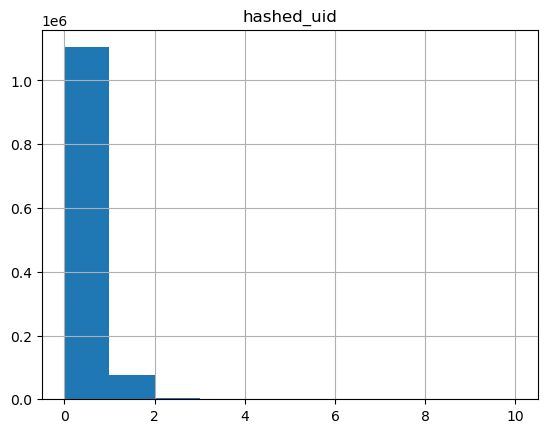

In [22]:
a[(a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_uid')

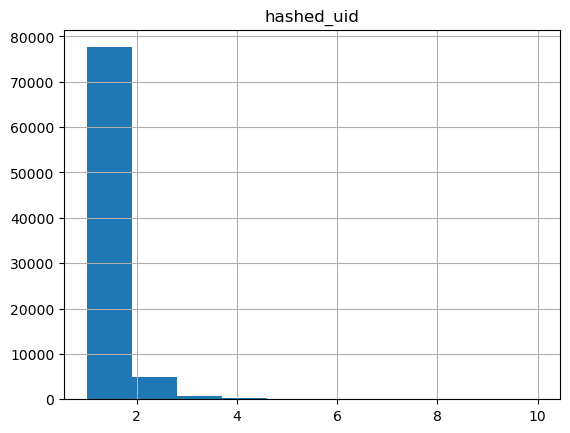

In [23]:
a[(a.is_display_clicked > 0) & (a.is_display_clicked < 20)].hist()
plt.title("hashed_uid")

Text(0.5, 1.0, 'hashed_xd_id')

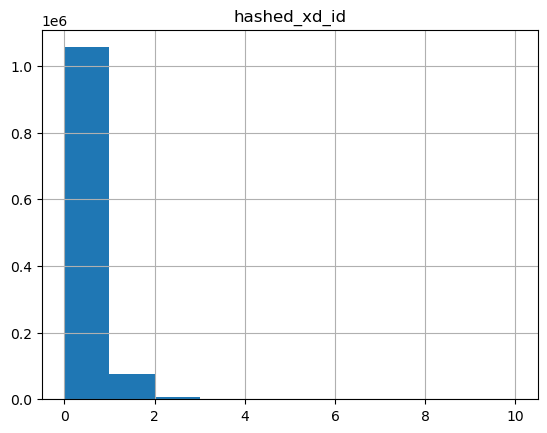

In [24]:
b[(b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

Text(0.5, 1.0, 'hashed_xd_id')

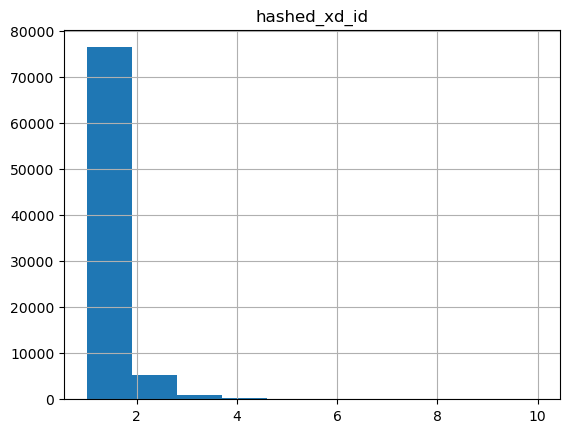

In [25]:
b[(b.is_display_clicked > 0) & (b.is_display_clicked < 20)].hist()
plt.title("hashed_xd_id")

## Valeurs nan dans les clics

Proportion des valeurs nan pour chaque variable parmi les publicités cliquées

In [26]:
c = df.loc[df['is_display_clicked']==1]
c.isnull().sum(axis = 0)/len(c)

day                                               0.000000
hashed_partner_id                                 0.000000
hashed_campaign_id                                0.000000
contextid                                         0.000000
display_env                                       0.000000
target_env                                        0.000000
rtbtypeid                                         0.002975
rtbadvisibility                                   0.002975
rtb_detectedlanguage                              0.002975
urlhash2                                          0.094472
urlhash3                                          0.094472
urlhash4                                          0.094472
user_country                                      0.000174
hashed_affiliateid                                0.000000
hashed_app_id                                     0.324941
googleviewability                                 0.618809
googlepagevertical                                0.0029

## Timestamp

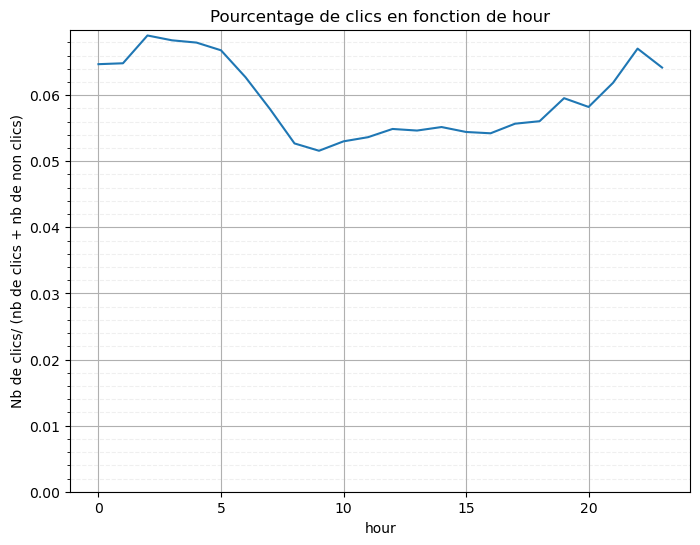

In [27]:
ratio_plot("hour")

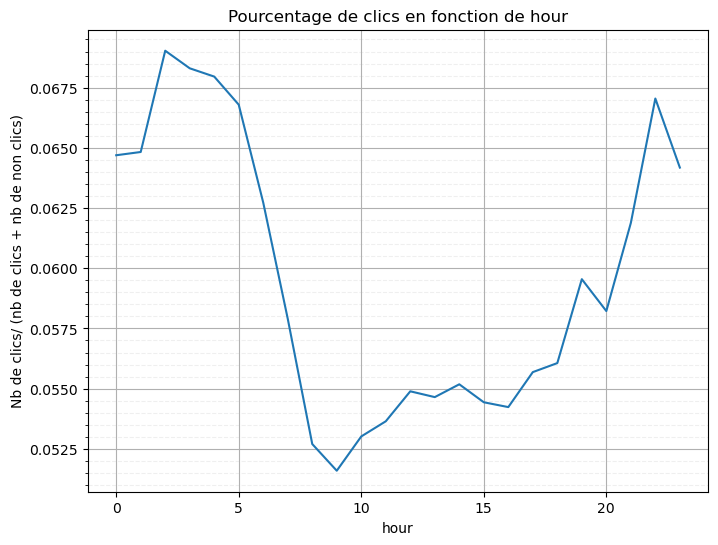

In [28]:
ratio_plot("hour", zoom=True)

In [29]:
df.head()

,day,hashed_partner_id,hashed_campaign_id,contextid,display_env,target_env,rtbtypeid,rtbadvisibility,rtb_detectedlanguage,urlhash2,...,is_display_clicked,zonecostineuro,timestamp,hour,weekday,display_size,nbdisplay_1h_discrete,campaignctrlast24h_discrete,ltf_nbpartnerclick_4w_discrete,display_size_discrete
793460,2020-10-14,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,3,web,1,4.0,2.0,12.0,-2.129443e+09,...,0,0.422000,2020-10-14 07:50:20,7,Wednesday,65520,8.05,0.004237,10.7,55080.0
1539751,2020-10-14,b'=\xa6\xeef\x99\xda\x1e\xb5-5\x8a\xa5\x9b\x8e...,b'7\xa0%5\x98\x02\x00\xe5\xa2\xfb\xd6\xa9^\xb7...,6,web,1,29.0,0.0,127.0,7.277829e+08,...,0,0.602358,2020-10-14 07:46:50,7,Wednesday,0,8.05,0.004237,10.7,55080.0
392403,2020-10-17,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'%\x01\xb1\xdf)Dh\x9f=j\xe81my\xf9\xa3\xe1\xd...,5,web,1,16.0,0.0,10.0,-1.821682e+09,...,0,0.435972,2020-10-17 18:25:50,18,Saturday,0,8.05,0.007061,10.7,55080.0
787914,2020-10-13,b'5IH\xefa\xd1\x01I\xfa\x91\xad\x1b\xf6\xa8go\...,b'|\xc9\x17R$I\xfb\xc76\x8c3}3^a\x99yaM\x1c\x9...,7,web,1,73.0,1.0,127.0,-8.462803e+08,...,0,0.422874,2020-10-13 10:17:00,10,Tuesday,4,8.05,0.004237,10.7,55080.0
932570,2020-10-15,b'\xa3w\x0e\x92#\xa6\xa8\x1b\xe2\xbeS\x85C\x10...,b'\xe1\xcb\xbbX[\xbb\x9dq\xc9\xdbu\xb8R\x96\x9...,9,web,1,6.0,2.0,10.0,-1.464124e+09,...,0,0.408502,2020-10-15 07:41:10,7,Thursday,242500,8.05,0.009886,10.7,275400.0


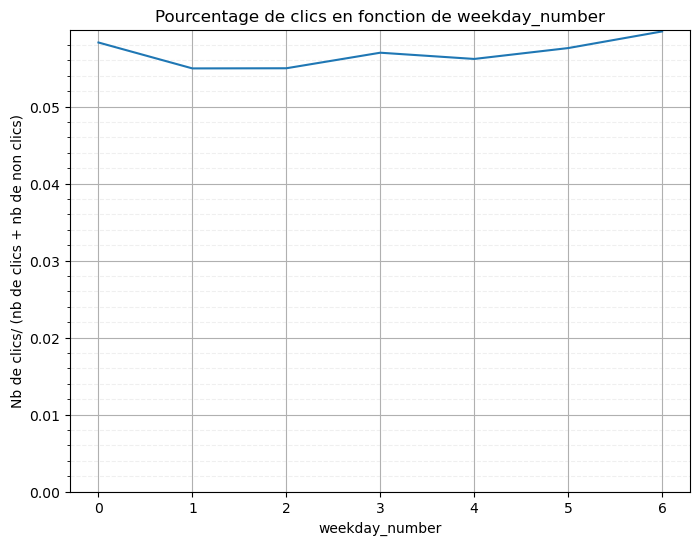

In [30]:
df['weekday_number'] = pd.to_datetime(df.timestamp).dt.weekday
ratio_plot("weekday_number")

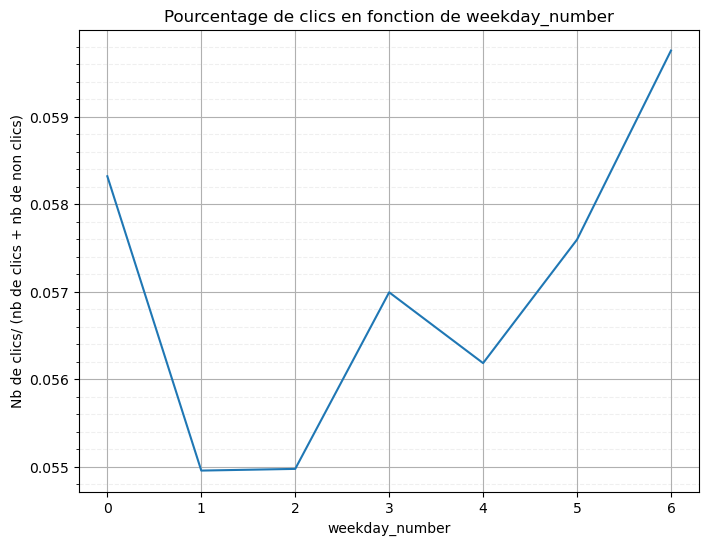

In [31]:
ratio_plot("weekday_number", zoom=True)

In [32]:
print(f"Temps d'exécution total : {time.strftime('%H:%M:%S', time.gmtime(time.time()-t))}")

Temps d'exécution total : 00:09:39
